# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Momin Muhammad

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
column_names = ['area' , 'perimeter', 'compactness', 'length of kernel', 'width','asymmetry coefficient', 'length of kernel groove', 'class']
df=pd.read_csv("seeds_dataset.txt", sep='\s+', header=None, names=column_names)
df.head()

,area,perimeter,compactness,length of kernel,width,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
y = df['class']
X = df.drop('class', axis = 1)

print(f"X shape={X.shape}")
print(f"y shape={y.shape}")

X shape=(210, 7)
y shape=(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [5]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# TODO: Print the shape of the training feature matrix and target vector
print(f"X_train shape={X_train.shape}")
print(f"y_train shape={y_train.shape}")

X_train shape=(168, 7)
y_train shape=(168,)


Now that we have our training data, we can implement our selected scaler.

In [37]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [38]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [39]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [40]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

grid_search_lr = GridSearchCV(model, param_grid, scoring=make_scorer(accuracy_score), cv=5)

grid_search_lr.fit(X_train_scaled, y_train)

print("\nBest Parameters based on accuracy_score:", grid_search_lr.best_params_)
print("\nAccuracy score for Best Parameters:", grid_search_lr.best_score_)
print("\nAccuracy test score:", grid_search_lr.score(X_test_scaled, y_test))



Best Parameters based on accuracy_score: {'C': 10.0, 'fit_intercept': True}

Accuracy score for Best Parameters: 0.9468805704099822

Accuracy test score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [41]:
# TODO: Predict y labels using best estimator
y_pred = grid_search_lr.best_estimator_.predict(X_test_scaled)

y_pred

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1],
      dtype=int64)

In [42]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

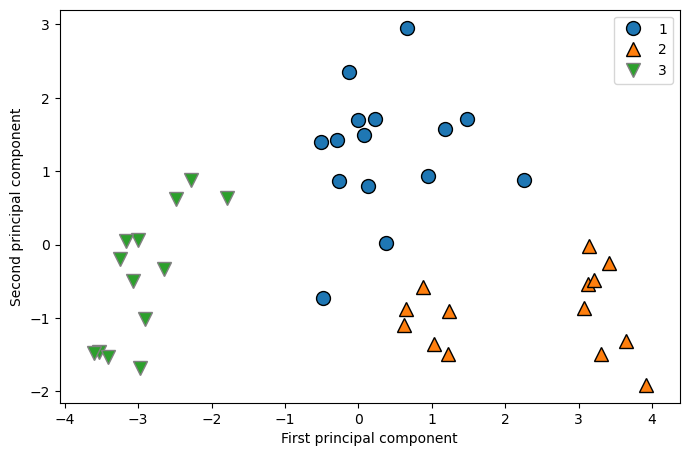

In [43]:
# TODO: Plot test points colored by predicted label
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_pred)
plt.legend()
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. The regression model worked well as the accuracy scores for both the training and test data were above 0.9 and close together. This means there was low variance and low bias)
1. The PCA seems to work well for this model as the predicted labels of class were clumped together nicely and seperate for each class. Since both PCA and logisitic regression worked well and they are both linear, we can assume the dataset is linear too.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. Sourced code from lab 5, lab 6, lab 8, Introduction to PCA.ipynb, PCA Applications.ipynb and my assignment 4.
1. I completed the steps in the same order they were listed.
1. I did not use generative AI.
1. I struggled with PCA a little bit, but reviewing the examples in class and labs helped me.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [44]:
# TODO: Scale feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

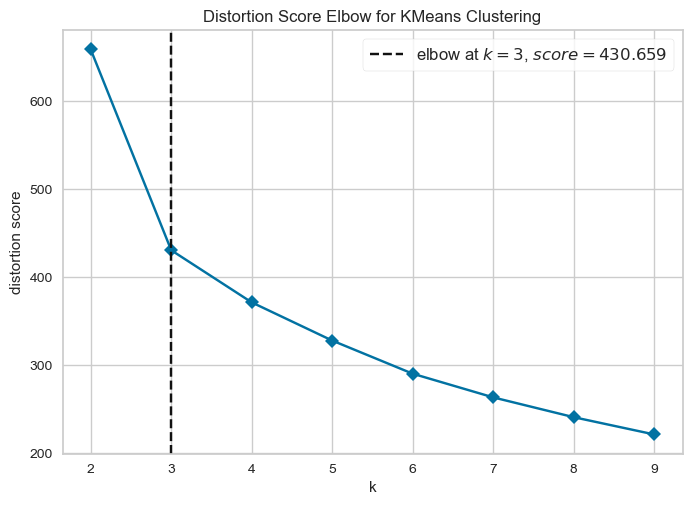

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [46]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=54), X_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [47]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(X_scaled)

C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\watsu\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [51]:
# TODO: Calculate the three different validation metrics
from sklearn import metrics

print(f"Silhouette coefficient={metrics.silhouette_score(X_scaled, kmeans.labels_)}")
print(f"Calinski harabasz index={metrics.calinski_harabasz_score(X_scaled, kmeans.labels_)}")
print(f"Calinski harabasz index={metrics.davies_bouldin_score(X_scaled, kmeans.labels_)}")

Silhouette coefficient=0.40072705527512986
Calinski harabasz index=249.78417491616472
Calinski harabasz index=0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

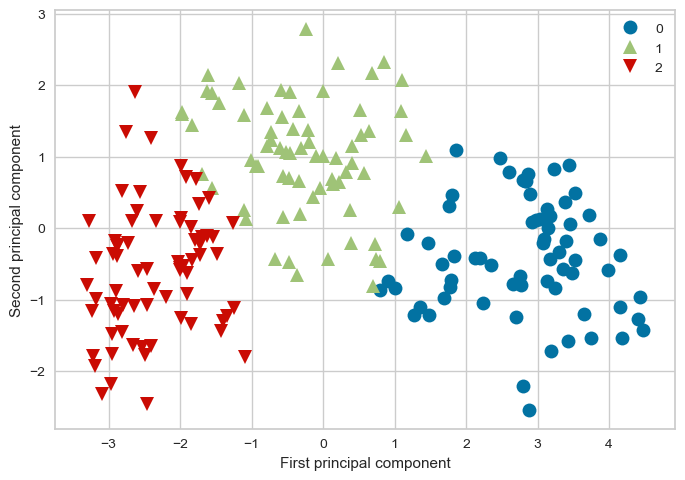

In [56]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], kmeans.labels_)
plt.legend()
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [60]:
# TODO: Find the number of principal components using explained variance ratio
print(pca.explained_variance_ratio_)

[0.71874303 0.17108184]


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# TODO: Use PCA to transform the data

In [ ]:
# TODO: Implement K-means with the transformed data

In [ ]:
# TODO: Calculate the three different validation metrics

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results

#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The orginal dataset had three class labels, so it makes sense that the optimal number of clusters was three.
1. Yes, the plots have similar distributions for the three classes.
1. I used two components to explain at least 95% of the variance. Yes, using PCA improved my results. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*